In [1]:
# Importando as Blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pmdarima
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20M%C3%A9xico.csv'

serie_mex = pd.read_csv(url)

serie_mex.drop(['Unnamed: 0','Confirmed','Recovered','Ano'],axis=1,
               inplace=True)
serie_mex['Date'] = pd.to_datetime(serie_mex['Date'],format='%Y-%m-%d')
serie_mex.set_index('Date',inplace=True)
serie_mex.head()

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [3]:
# Selecionando apenas os primeiros meses do dataset
serie_chi = serie_mex[0:161]

In [4]:
treino = serie_mex[0:131]
teste = serie_mex[131:161]

In [5]:
step1 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1391.975, Time=0.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1391.686, Time=0.30 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1389.486, Time=1.72 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1390.592, Time=0.17 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1388.119, Time=0.70 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1386.756, Time=0.42 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1387.653, Time=1.62 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1346.425, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1348.353, Time=0.30 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1349.843, Time=1.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1348.343, Time=0.25 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1349.975, Time=0.83 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1350.079, Time=1.57 sec
 ARIM

In [6]:
step2 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1322.259, Time=1.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1391.975, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1328.338, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1348.353, Time=0.27 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1340.987, Time=0.12 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1320.532, Time=0.97 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1329.239, Time=0.36 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1319.941, Time=3.29 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1322.891, Time=0.95 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1321.555, Time=4.45 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1320.350, Time=2.24 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1350.701, Time=1.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1318.249, Time=2.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1318.601, Time=0.74 sec
 ARIMA(1,1,0)(2,1,0

In [7]:
step1.fit(treino['Deaths'])

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [8]:
step2.fit(treino['Deaths'])

ARIMA(order=(1, 1, 5), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [9]:
future_forecast=step1.predict(n_periods=len(teste))

In [10]:
future_forecast1 = step2.predict(n_periods=len(teste))

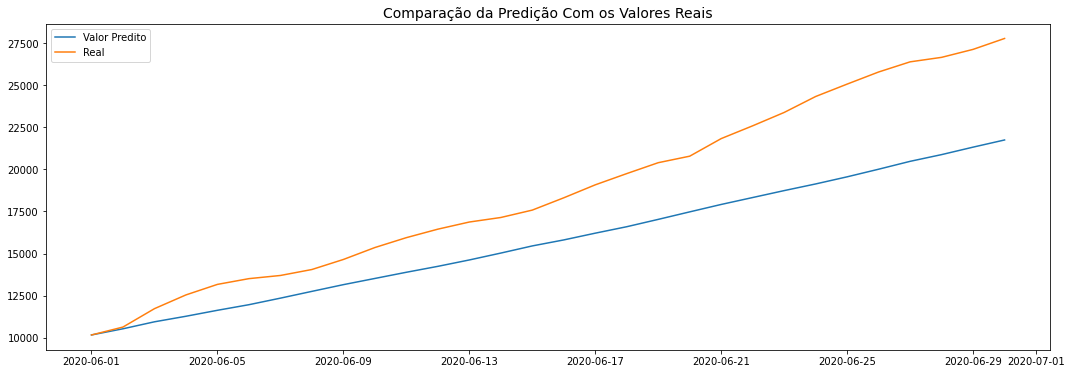

In [11]:
plt.figure(figsize=(18,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [12]:
mae = mean_absolute_error(teste['Deaths'],future_forecast)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast)
rmse = mean_squared_error(teste['Deaths'],future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 2997.964596865811
MAPE: 0.14422425267503902
RMSE: 3510.039322925368


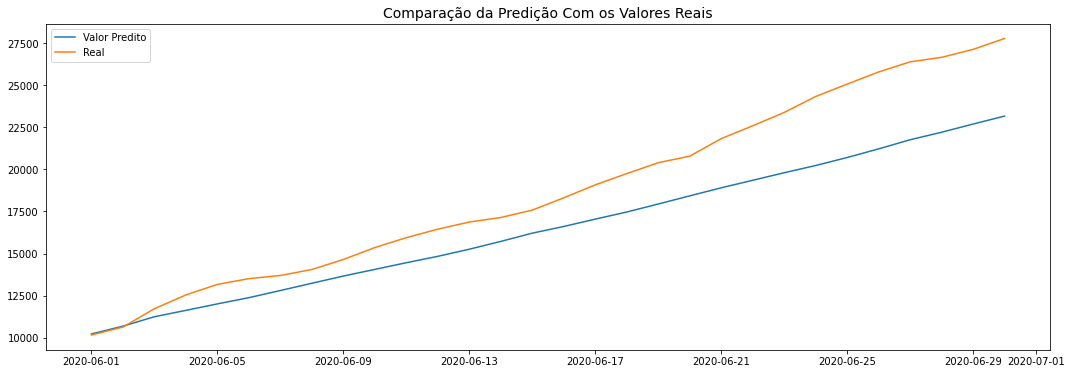

In [13]:
plt.figure(figsize=(18,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast1,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [14]:
mae = mean_absolute_error(teste['Deaths'],future_forecast1)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast1)
rmse = mean_squared_error(teste['Deaths'],future_forecast1)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 2232.8040274264918
MAPE: 0.10629720736651711
RMSE: 2667.0505422324854
